In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.transforms as transforms
import seaborn as sns

In [3]:
import matplotlib.colors as plt_colors

In [4]:
import phik

In [5]:
def plot_correlation_matrix(
    matrix_colors:np.ndarray,
    x_labels:list,
    y_labels:list,
    fig,
    ax,
    pdf_file_name:str='',
    title:str='correlation',
    vmin:float=-1,
    vmax:float=1,
    color_map:str='RdYlGn',
    x_label:str='',
    y_label:str='',
    top:int=20,
    matrix_numbers:np.ndarray=None,
    print_both_numbers:bool=True,
    usetex:bool=False,
    identity_layout:bool=True,
    fontsize_factor:float=1
) -> None:
    """Create and plot correlation matrix.

    Copied with permission from the eskapade package (pip install eskapade)

    :param matrix_colors: input correlation matrix
    :param list x_labels: Labels for histogram x-axis bins
    :param list y_labels: Labels for histogram y-axis bins
    :param str pdf_file_name: if set, will store the plot in a pdf file
    :param str title: if set, title of the plot
    :param float vmin: minimum value of color legend (default is -1)
    :param float vmax: maximum value of color legend (default is +1)
    :param str x_label: Label for histogram x-axis
    :param str y_label: Label for histogram y-axis
    :param str color_map: color map passed to matplotlib pcolormesh. (default is 'RdYlGn')
    :param int top: only print the top 20 characters of x-labels and y-labels. (default is 20)
    :param matrix_numbers: input matrix used for plotting numbers. (default it matrix_colors)
    :param identity_layout: Plot diagonal from right top to bottom left (True) or bottom left to top right (False)
    """
    if not isinstance(matrix_colors, np.ndarray):
        raise TypeError('matrix_colors is not a numpy array.')
    
    # basic matrix checks
    assert (matrix_colors.shape[0] == len(y_labels)) or (matrix_colors.shape[0] + 1 == len(y_labels)), \
        'matrix_colors shape inconsistent with number of y-labels'
    assert (matrix_colors.shape[1] == len(x_labels)) or (matrix_colors.shape[1] + 1 == len(x_labels)), \
        'matrix_colors shape inconsistent with number of x-labels'
    if matrix_numbers is None:
        matrix_numbers = matrix_colors
        print_both_numbers = False  # only one set of numbers possible
    else:
        assert matrix_numbers.shape[0] == len(y_labels), 'matrix_numbers shape inconsistent with number of y-labels'
        assert matrix_numbers.shape[1] == len(x_labels), 'matrix_numbers shape inconsistent with number of x-labels'

    if identity_layout:
        matrix_colors = np.array([a[::-1] for a in matrix_colors])
        x_labels = x_labels[::-1]
        if matrix_numbers is not None:
            matrix_numbers = np.array([a[::-1] for a in matrix_numbers])

    plt.rc('text', usetex=usetex)

    # cmap = 'RdYlGn' #'YlGn'
    norm = plt_colors.Normalize(vmin=vmin, vmax=vmax)
    img = ax.pcolormesh(matrix_colors, cmap=color_map, edgecolor='w', linewidth=1, norm=norm)

    # set x-axis properties
    def tick(lab):
        """Get tick."""
        if isinstance(lab, (float, int)):
            lab = 'NaN' if np.isnan(lab) else '{0:.0f}'.format(lab)
        lab = str(lab)
        if len(lab) > top:
            lab = lab[:17] + '...'
        return lab

    # reduce default fontsizes in case too many labels?
    # nlabs = max(len(y_labels), len(x_labels))

    # axis ticks and tick labels
    if len(x_labels) == matrix_colors.shape[1] + 1:
        ax.set_xticks(np.arange(len(x_labels)))
    else:
        ax.set_xticks(np.arange(len(x_labels)) + 0.5)
    ax.set_xticklabels([tick(lab) for lab in x_labels], rotation='vertical', fontsize=10 * fontsize_factor)

    if len(y_labels) == matrix_colors.shape[0] + 1:
        ax.set_yticks(np.arange(len(y_labels)))
    else:
        ax.set_yticks(np.arange(len(y_labels)) + 0.5)
    ax.set_yticklabels([tick(lab) for lab in y_labels], rotation='horizontal', fontsize=10 * fontsize_factor)

    # Turn ticks off in case no labels are provided
    if len(x_labels)==1 and len(x_labels[0]) == 0:
        plt.tick_params(
            axis='x',  # changes apply to the x-axis
            which='both',  # both major and minor ticks are affected
            bottom=False,  # ticks along the bottom edge are off
            top=False,  # ticks along the top edge are off
            labelbottom=False)
    if len(y_labels)==1 and len(y_labels[0]) == 0:
        plt.tick_params(
            axis='y',  # changes apply to the x-axis
            which='both',  # both major and minor ticks are affected
            left=False,  # ticks along the bottom edge are off
            right=False,  # ticks along the top edge are off
            labelbottom=False)

    # make plot look pretty
    ax.set_title(title, fontsize=14 * fontsize_factor)
    if x_label:
        ax.set_xlabel(x_label, fontsize=12 * fontsize_factor)
    if y_label:
        ax.set_ylabel(y_label, fontsize=12 * fontsize_factor)

    # annotate with correlation values
    numbers_set = [matrix_numbers] if not print_both_numbers else [matrix_numbers, matrix_colors]
    for i in range(matrix_numbers.shape[1]):
        for j in range(matrix_numbers.shape[0]):
            point_color = float(matrix_colors[j][i])
            white_cond = (point_color < 0.7 * vmin) or (point_color >= 0.7 * vmax) or np.isnan(point_color)
            y_offset = 0.5
            for m, matrix in enumerate(numbers_set):
                if print_both_numbers:
                    if m == 0:
                        y_offset = 0.7
                    elif m == 1:
                        y_offset = 0.25
                point = float(matrix[j][i])
                label = 'NaN' if np.isnan(point) else '{0:.2f}'.format(point)
                color = 'w' if white_cond else 'k'
                ax.annotate(label, xy=(i + 0.5, j + y_offset), color=color, horizontalalignment='center',
                            verticalalignment='center', fontsize=10 * fontsize_factor)

    plt.tight_layout()


In [6]:
#plt.style.use('seaborn')
plt.rcParams['text.color'] = 'black'
plt.rcParams['figure.max_open_warning'] = 0
colors = [i['color'] for i in plt.rcParams['axes.prop_cycle']]
markers = ['o', 's', 'p', 'x', '^', '+', '*', '<', 'D', 'h', '>']
%matplotlib inline

In [7]:
plt.style.use('seaborn')

## Data set -- Fake insurance set

In [8]:
data_set = 'insurance'

In [9]:
df = pd.read_csv('fake_insurance_data.csv.gz')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   car_color   2000 non-null   object 
 1   driver_age  2000 non-null   float64
 2   area        2000 non-null   object 
 3   mileage     2000 non-null   float64
 4   car_size    2000 non-null   object 
dtypes: float64(2), object(3)
memory usage: 78.2+ KB


In [10]:
df.head()

,car_color,driver_age,area,mileage,car_size
0,black,26.377219,suburbs,156806.288398,XXL
1,black,58.976840,suburbs,74400.323559,XL
2,multicolor,55.744988,downtown,267856.748015,XXL
3,metalic,57.629139,downtown,259028.249060,XXL
4,green,21.490637,downtown,110712.216080,XL


In [11]:
N, M = df.shape

In [12]:
num_cols = ['driver_age', 'mileage']
cat_cols = ['car_color', 'area', 'car_size']
rot_labels = ['car_color', 'area']

In [13]:
subset_cols = ['driver_age', 'mileage', 'car_size']

In [14]:
ss = df.loc[:, subset_cols]

N, M = ss.shape

## Process data

In [15]:
data_types = {'severity': 'interval',
             'driver_age':'interval',
             'satisfaction':'ordinal',
             'mileage':'interval',
             'car_size':'ordinal',
             'car_use':'ordinal',
             'car_color':'categorical',
             'area':'categorical'}

interval_cols = [col for col, v in data_types.items() if v=='interval' and col in df.columns]
interval_cols
num_cols_idx = [i for i, col in enumerate(df.columns) if data_types[col] == 'interval']
cat_cols_idx = [i for i, col in enumerate(df.columns) if data_types[col] != 'interval']
# interval_cols is used below

size_map = {
    'XS': 0,
    'S': 1,
    'M': 2,
    'L': 3,
    'XL': 4,
    'XXL': 5 
}


area_map = {v: i for i, v in enumerate(df['area'].unique())}
car_color_map = {v: i for i, v in enumerate(df['car_color'].unique())}

rev_size_map = {v: k for k, v in size_map.items()}
rev_area_map = {v: k for k, v in area_map.items()}
rev_car_color_map = {v: k for k, v in car_color_map.items()}

In [16]:
df_num = df.replace(size_map).replace(area_map).replace(car_color_map)

## Fit

In [17]:
from synthsonic.models.kde_copula_nn_pdf import KDECopulaNNPdf
from sklearn.neural_network import MLPClassifier
import xgboost as xgb

In [18]:
import logging 
logging.basicConfig(level=logging.INFO)

In [19]:
clf = xgb.XGBClassifier(
    n_estimators=100,
    reg_lambda=1,
    gamma=0,
    max_depth=5
)

In [20]:
kde = KDECopulaNNPdf(use_KDE=False, n_uniform_bins=50, numerical_columns=num_cols_idx, categorical_columns=cat_cols_idx, n_quantiles=200)

In [21]:
kde = kde.fit(df_num.values)

INFO:KDECopulaNNPdf:Processing 2 numerical and 3 categorical columns
INFO:KDECopulaNNPdf:Transforming numerical variables.
INFO:KDECopulaNNPdf:Configuring Bayesian Network (cat+num).
INFO:KDECopulaNNPdf:n_uniform_bins = 50
Building tree: 100%|██████████| 6/6.0 [00:00<00:00, 2422.12it/s]
INFO:KDECopulaNNPdf:Configuring classifier.
INFO:KDECopulaNNPdf:Generating 251300 data points.
Generating for node: 2: 100%|██████████| 5/5 [00:12<00:00,  2.44s/it]
INFO:KDECopulaNNPdf:Fitting discriminative learner: selected 5 features.
INFO:KDECopulaNNPdf:Calibrating classifier.
INFO:KDECopulaNNPdf:N_bins = 12
INFO:KDECopulaNNPdf:Maximum weight found: 1.8290336016133901


## Generate weighted sample

In [22]:
X_gen = kde.sample_no_weights(n_samples=df_num.shape[0])
df_gen = pd.DataFrame(X_gen, columns=df.columns)
df_gen.loc[:, 'car_color'].replace(rev_car_color_map, inplace=True)
df_gen.loc[:, 'car_size'].replace(rev_size_map, inplace=True)
df_gen.loc[:, 'area'].replace(rev_area_map, inplace=True)

# Phik
phik_overview_gen = phik.phik_matrix(df_gen, interval_cols=interval_cols)

## Sample without classifier

In [23]:
X_gen_unw, _ = kde.sample(n_samples=df_num.shape[0])

In [24]:
df_gen_unw = pd.DataFrame(X_gen_unw, columns=df.columns)
df_gen_unw.loc[:, 'car_color'].replace(rev_car_color_map, inplace=True)
df_gen_unw.loc[:, 'car_size'].replace(rev_size_map, inplace=True)
df_gen_unw.loc[:, 'area'].replace(rev_area_map, inplace=True)

phik_overview_gen_unw = phik.phik_matrix(df_gen_unw, interval_cols=interval_cols)

## PhiK plots

In [25]:
phik_overview = phik.phik_matrix(df, interval_cols=interval_cols)

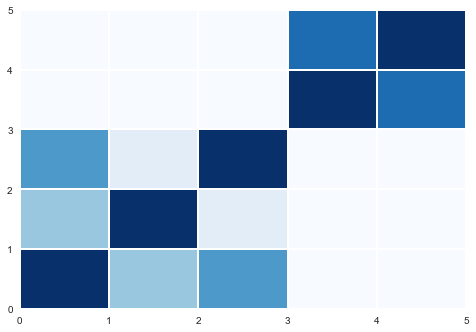

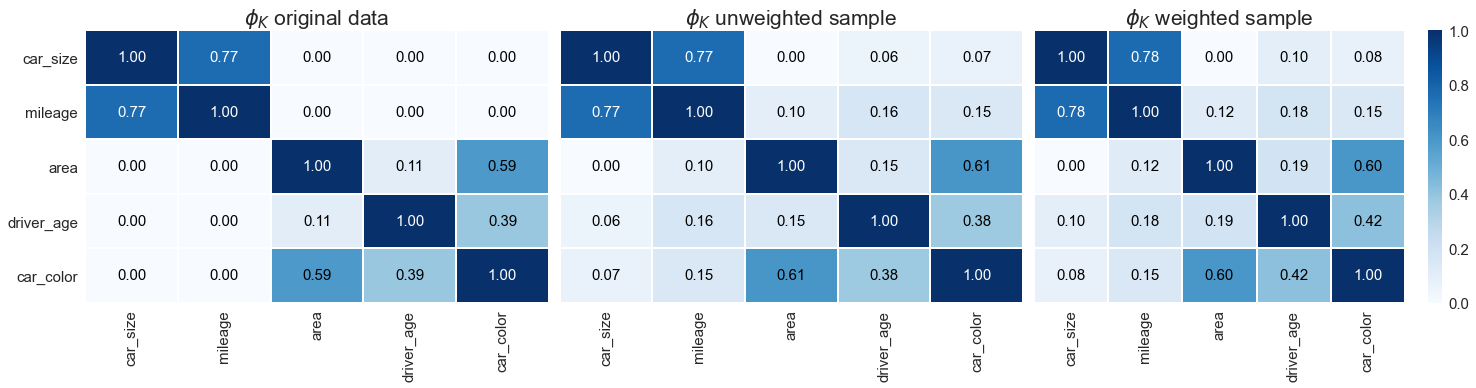

In [26]:
vmin = 0
vmax = 1
color_map = 'Blues'
norm = plt_colors.Normalize(vmin=vmin, vmax=vmax)
img = plt.pcolormesh(phik_overview.values, cmap=color_map, edgecolor='w', linewidth=1, norm=norm);

fig, axs = plt.subplots(ncols=3, sharey=True, figsize=(21, 5.5))
plot_correlation_matrix(
    phik_overview.values,
    fig=fig,
    ax=axs[0],
    x_labels=phik_overview.columns,
    y_labels=phik_overview.index, 
    vmin=vmin,
    vmax=vmax,
    color_map=color_map,
    title=r'$\phi_K$ original data',
    fontsize_factor=1.5,
)

plot_correlation_matrix(
    phik_overview_gen_unw.values,
    fig=fig,
    ax=axs[1],
    x_labels=phik_overview.columns,
    y_labels=phik_overview.index, 
    vmin=vmin,
    vmax=vmax,
    color_map=color_map,
    title=r'$\phi_K$ unweighted sample',
    fontsize_factor=1.5,
)

plot_correlation_matrix(
    phik_overview_gen.values,
    fig=fig,
    ax=axs[2],
    x_labels=phik_overview.columns,
    y_labels=phik_overview.index, 
    vmin=vmin,
    vmax=vmax,
    color_map=color_map,
    title=r'$\phi_K$ weighted sample',
    fontsize_factor=1.5,
)
cb = fig.colorbar(img)
cb.ax.tick_params(labelsize=15)
fig.savefig(f'{data_set}_phik_gen_sample.png', dpi=300)

## Check significance

In [27]:
from phik.report import plot_correlation_matrix as phi_plot_correlation_matrix

In [28]:
import scipy

In [29]:
phik_overview_gen_unw_corr = phik_overview_gen_unw.copy()
sign_unw = phik.significance_matrix(df_gen_unw, interval_cols=interval_cols)
phik_overview_gen_unw_corr.values[scipy.stats.norm.sf(np.abs(sign_unw.values)) * 2 > 0.05] = 0.0

In [30]:
phik_overview_gen_corr = phik_overview_gen.copy()
sign = phik.significance_matrix(df_gen, interval_cols=interval_cols)
phik_overview_gen_corr.values[scipy.stats.norm.sf(np.abs(sign.values)) * 2 > 0.05] = 0.0

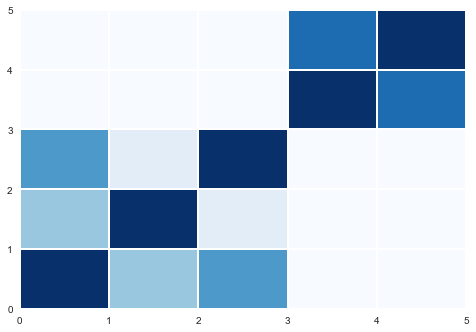

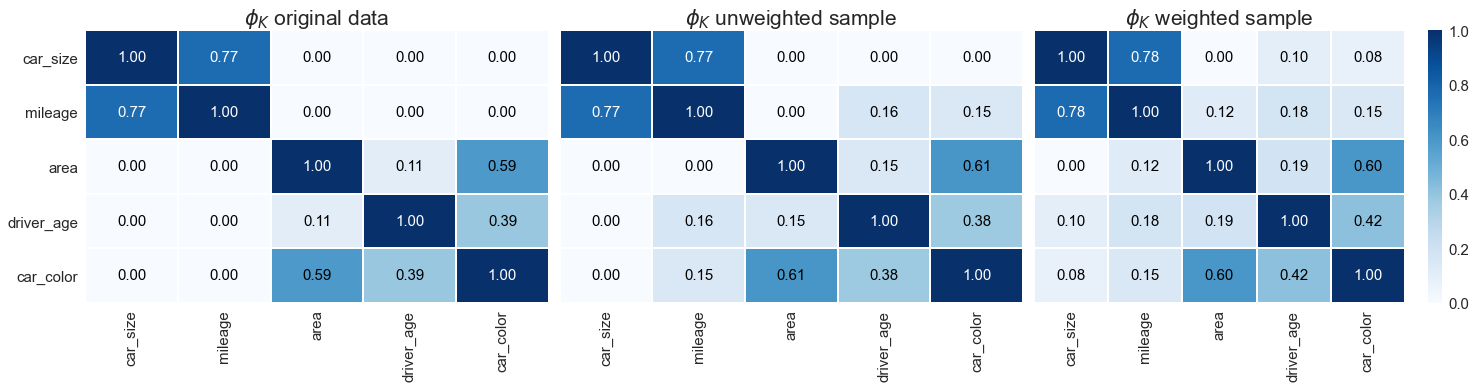

In [31]:
vmin = 0
vmax = 1
color_map = 'Blues'
norm = plt_colors.Normalize(vmin=vmin, vmax=vmax)
img = plt.pcolormesh(phik_overview.values, cmap=color_map, edgecolor='w', linewidth=1, norm=norm);

fig, axs = plt.subplots(ncols=3, sharey=True, figsize=(21, 5.5))
plot_correlation_matrix(
    phik_overview.values,
    fig=fig,
    ax=axs[0],
    x_labels=phik_overview.columns,
    y_labels=phik_overview.index, 
    vmin=vmin,
    vmax=vmax,
    color_map=color_map,
    title=r'$\phi_K$ original data',
    fontsize_factor=1.5,
)

plot_correlation_matrix(
    phik_overview_gen_unw_corr.values,
    fig=fig,
    ax=axs[1],
    x_labels=phik_overview.columns,
    y_labels=phik_overview.index, 
    vmin=vmin,
    vmax=vmax,
    color_map=color_map,
    title=r'$\phi_K$ unweighted sample',
    fontsize_factor=1.5,
)

plot_correlation_matrix(
    phik_overview_gen_corr.values,
    fig=fig,
    ax=axs[2],
    x_labels=phik_overview.columns,
    y_labels=phik_overview.index, 
    vmin=vmin,
    vmax=vmax,
    color_map=color_map,
    title=r'$\phi_K$ weighted sample',
    fontsize_factor=1.5,
)
cb = fig.colorbar(img)
cb.ax.tick_params(labelsize=15)

## Remaining structure per step

In [32]:
from sklearn.utils import check_array
from sklearn.utils.validation import FLOAT_DTYPES # check_is_fitted, _deprecate_positional_args

In [33]:
X = df_num.values

In [34]:
X_cat = X[:, kde.categorical_columns]
X_num = X[:, kde.numerical_columns]
if len(kde.numerical_columns) > 0:
    X_num = check_array(X_num, copy=False, dtype=FLOAT_DTYPES, force_all_finite="allow-nan")

# sample profiles
n_samples, n_features = X_num.shape
X_uniform = kde.pipe_.transform(X_num)

# discretize continuous variables; use these as input to model bayesian network
bin_width = 1. / kde.n_uniform_bins
X_num_discrete = np.floor(X_uniform / bin_width)
X_num_discrete[X_num_discrete >= kde.n_uniform_bins] = kde.n_uniform_bins - 1  # correct for values at 1.
# joining cat and num-discrete, then reorder to original order
X_discrete = kde._join_and_reorder(X_cat, X_num_discrete, kde.categorical_columns, kde.numerical_columns)

In [35]:
rem_discrete = X.copy()
rem_discrete[:, [1, 3]] = X_uniform.squeeze()

In [36]:
df_discrete = pd.DataFrame(rem_discrete, columns=df.columns)
df_discrete.loc[:, 'car_color'] = df_discrete.loc[:, 'car_color'].astype(np.int64).replace(rev_car_color_map)
df_discrete.loc[:, 'car_size'] = df_discrete.loc[:, 'car_size'].astype(np.int64).replace(rev_size_map)
df_discrete.loc[:, 'area'] = df_discrete.loc[:, 'area'].astype(np.int64).replace(rev_area_map)

phik_discrete = phik.phik_matrix(df_discrete, interval_cols=interval_cols)

### Bayesian Network

In [37]:
X_df_discrete = pd.DataFrame(X_discrete, columns=[str(i) for i in range(df.shape[1])])

X_bn_pred = pd.DataFrame(columns=X_df_discrete.columns)
for c in X_bn_pred.columns:
    X_bn_pred[c] = kde.bn.predict(X_df_discrete.drop(c, axis=1), stochastic=False).values.flatten()

100%|██████████| 1942/1942 [00:16<00:00, 114.76it/s]


In [38]:
X_bn_pred.columns = [int(i) for i in X_bn_pred.columns]

bin_width = 1. / kde.n_uniform_bins
X_rand = np.random.uniform(low=0., high=bin_width, size=(X_bn_pred.shape[0], len(kde.numerical_columns)))
X_bn_pred.loc[:, kde.numerical_columns] = X_bn_pred.loc[:, kde.numerical_columns] * bin_width + X_rand
X_bn_pred.loc[:, kde.numerical_columns] = kde.pipe_.inverse_transform(X_bn_pred.loc[:, kde.numerical_columns])
X_bn_pred.columns = df_num.columns

X_bn = X_bn_pred.copy()

for i, c in enumerate(X_bn_pred.columns):
    X_bn.loc[:, c] = X[:, i] - X_bn_pred.loc[:, c].values

X_bn.columns = df.columns
X_bn.loc[:, 'car_color'] = X_bn.loc[:, 'car_color'].astype(np.int64).replace(rev_car_color_map)
X_bn.loc[:, 'car_size'] = X_bn.loc[:, 'car_size'].astype(np.int64).replace(rev_size_map)
X_bn.loc[:, 'area'] = X_bn.loc[:, 'area'].astype(np.int64).replace(rev_area_map)

phik_bn = phik.phik_matrix(X_bn, interval_cols=interval_cols)

X_bn_pred.loc[:, 'car_color'] = X_bn_pred.loc[:, 'car_color'].astype(np.int64)
X_bn_pred.loc[:, 'car_size'] = X_bn_pred.loc[:, 'car_size'].astype(np.int64)
X_bn_pred.loc[:, 'area'] = X_bn_pred.loc[:, 'area'].astype(np.int64)

## Weighted sample

In [39]:
sample_weights = kde._scale(X_bn_pred.values[:, kde.nonlinear_indices_])
sample_weights /= np.sum(sample_weights)
rand_ind = np.random.choice(np.arange(0, df.shape[0]), size=df.shape[0], replace=True, p=sample_weights)
phik_wght = phik.phik_matrix(X_bn.loc[rand_ind], interval_cols=interval_cols)

TypeError: 'AxesSubplot' object is not subscriptable

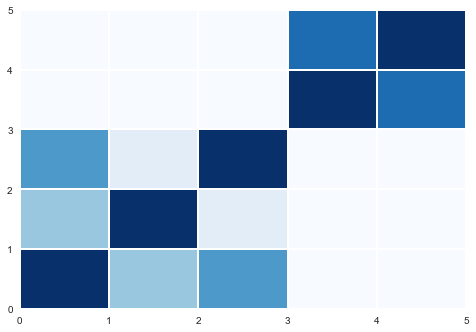

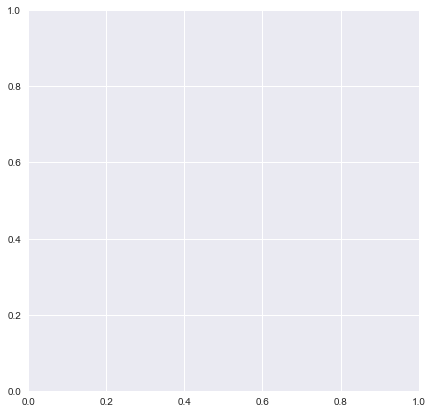

In [40]:
vmin = 0
vmax = 1
color_map = 'Blues'
norm = plt_colors.Normalize(vmin=vmin, vmax=vmax)
img = plt.pcolormesh(phik_overview.values, cmap=color_map, edgecolor='w', linewidth=1, norm=norm);

fig, axs = plt.subplots(figsize=(7, 7))
plot_correlation_matrix(
    phik_overview.values,
    fig=fig,
    ax=axs[0],
    x_labels=phik_overview.columns,
    y_labels=phik_overview.index, 
    vmin=vmin,
    vmax=vmax,
    color_map=color_map,
    title=r'$\phi_K$ original data',
    fontsize_factor=1.5,
)

In [ ]:
vmin = 0
vmax = 1
color_map = 'Blues'
norm = plt_colors.Normalize(vmin=vmin, vmax=vmax)
img = plt.pcolormesh(phik_overview.values, cmap=color_map, edgecolor='w', linewidth=1, norm=norm);

fig, axs = plt.subplots(ncols=3, sharey=True, figsize=(21, 5.5))
plot_correlation_matrix(
    phik_overview.values,
    fig=fig,
    ax=axs[0],
    x_labels=phik_overview.columns,
    y_labels=phik_overview.index, 
    vmin=vmin,
    vmax=vmax,
    color_map=color_map,
    title=r'$\phi_K$ original data',
    fontsize_factor=1.5,
)

plot_correlation_matrix(
    phik_bn.values,
    fig=fig,
    ax=axs[1],
    x_labels=phik_overview.columns,
    y_labels=phik_overview.index, 
    vmin=vmin,
    vmax=vmax,
    color_map=color_map,
    title=r'$\phi_K$ post Bayesian Network',
    fontsize_factor=1.5,
)

plot_correlation_matrix(
    phik_wght.values,
    fig=fig,
    ax=axs[2],
    x_labels=phik_overview.columns,
    y_labels=phik_overview.index, 
    vmin=vmin,
    vmax=vmax,
    color_map=color_map,
    title=r'$\phi_K$ post callibrated learner',
    fontsize_factor=1.5,
)
cb = fig.colorbar(img)
cb.ax.tick_params(labelsize=15)
fig.savefig(f'{data_set}_phik_remaining_structure.png', dpi=300)